# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [7]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [189]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures

from sklearn import svm, datasets
from pyspark.sql import SparkSession
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV

from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel


In [9]:
cars = pd.read_csv('data/vehicles.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [10]:
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [11]:
# Analyzing price attribute
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


Skewness: 254.406932
Kurtosis: 69205.088590


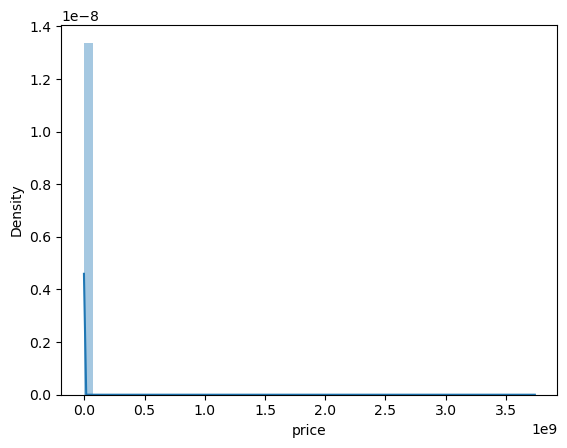

In [15]:
# Distribution of price
sns.distplot(cars['price'])
#skewness and kurtosis
print("Skewness: %f" % cars['price'].skew())
print("Kurtosis: %f" % cars['price'].kurt())
plt.savefig('./images/1_dist_plot_price.png')

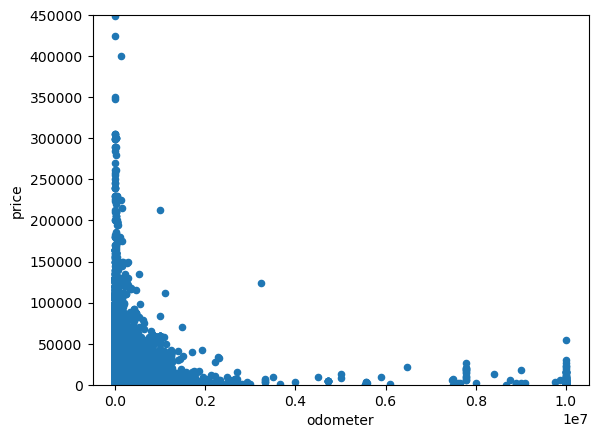

In [26]:
# Scatter plot Odometer / Price

attrib = 'odometer'
data = pd.concat([cars['price'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='price', ylim=(0,450000));
plt.savefig('./images/2_scatter_price_odometer.png')


In [27]:
"""
We see that the lesser is the Odometer, the higher tends to be the price. 
"""

'\nWe see that the lesser is the Odometer, the higher tends to be the price. \n'

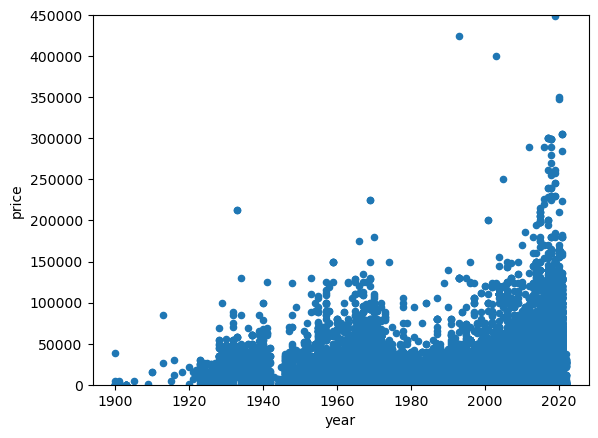

In [28]:
# Scatter plot Year / Price
attrib = 'year'
data = pd.concat([cars['price'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='price', ylim=(0,450000));
plt.savefig('./images/3_scatter_price_year.png')


In [29]:
"""
Prices tend to be higher as cars are more recent.
"""

'\nPrices tend to be higher as cars are more recent, and viceversa.\n'

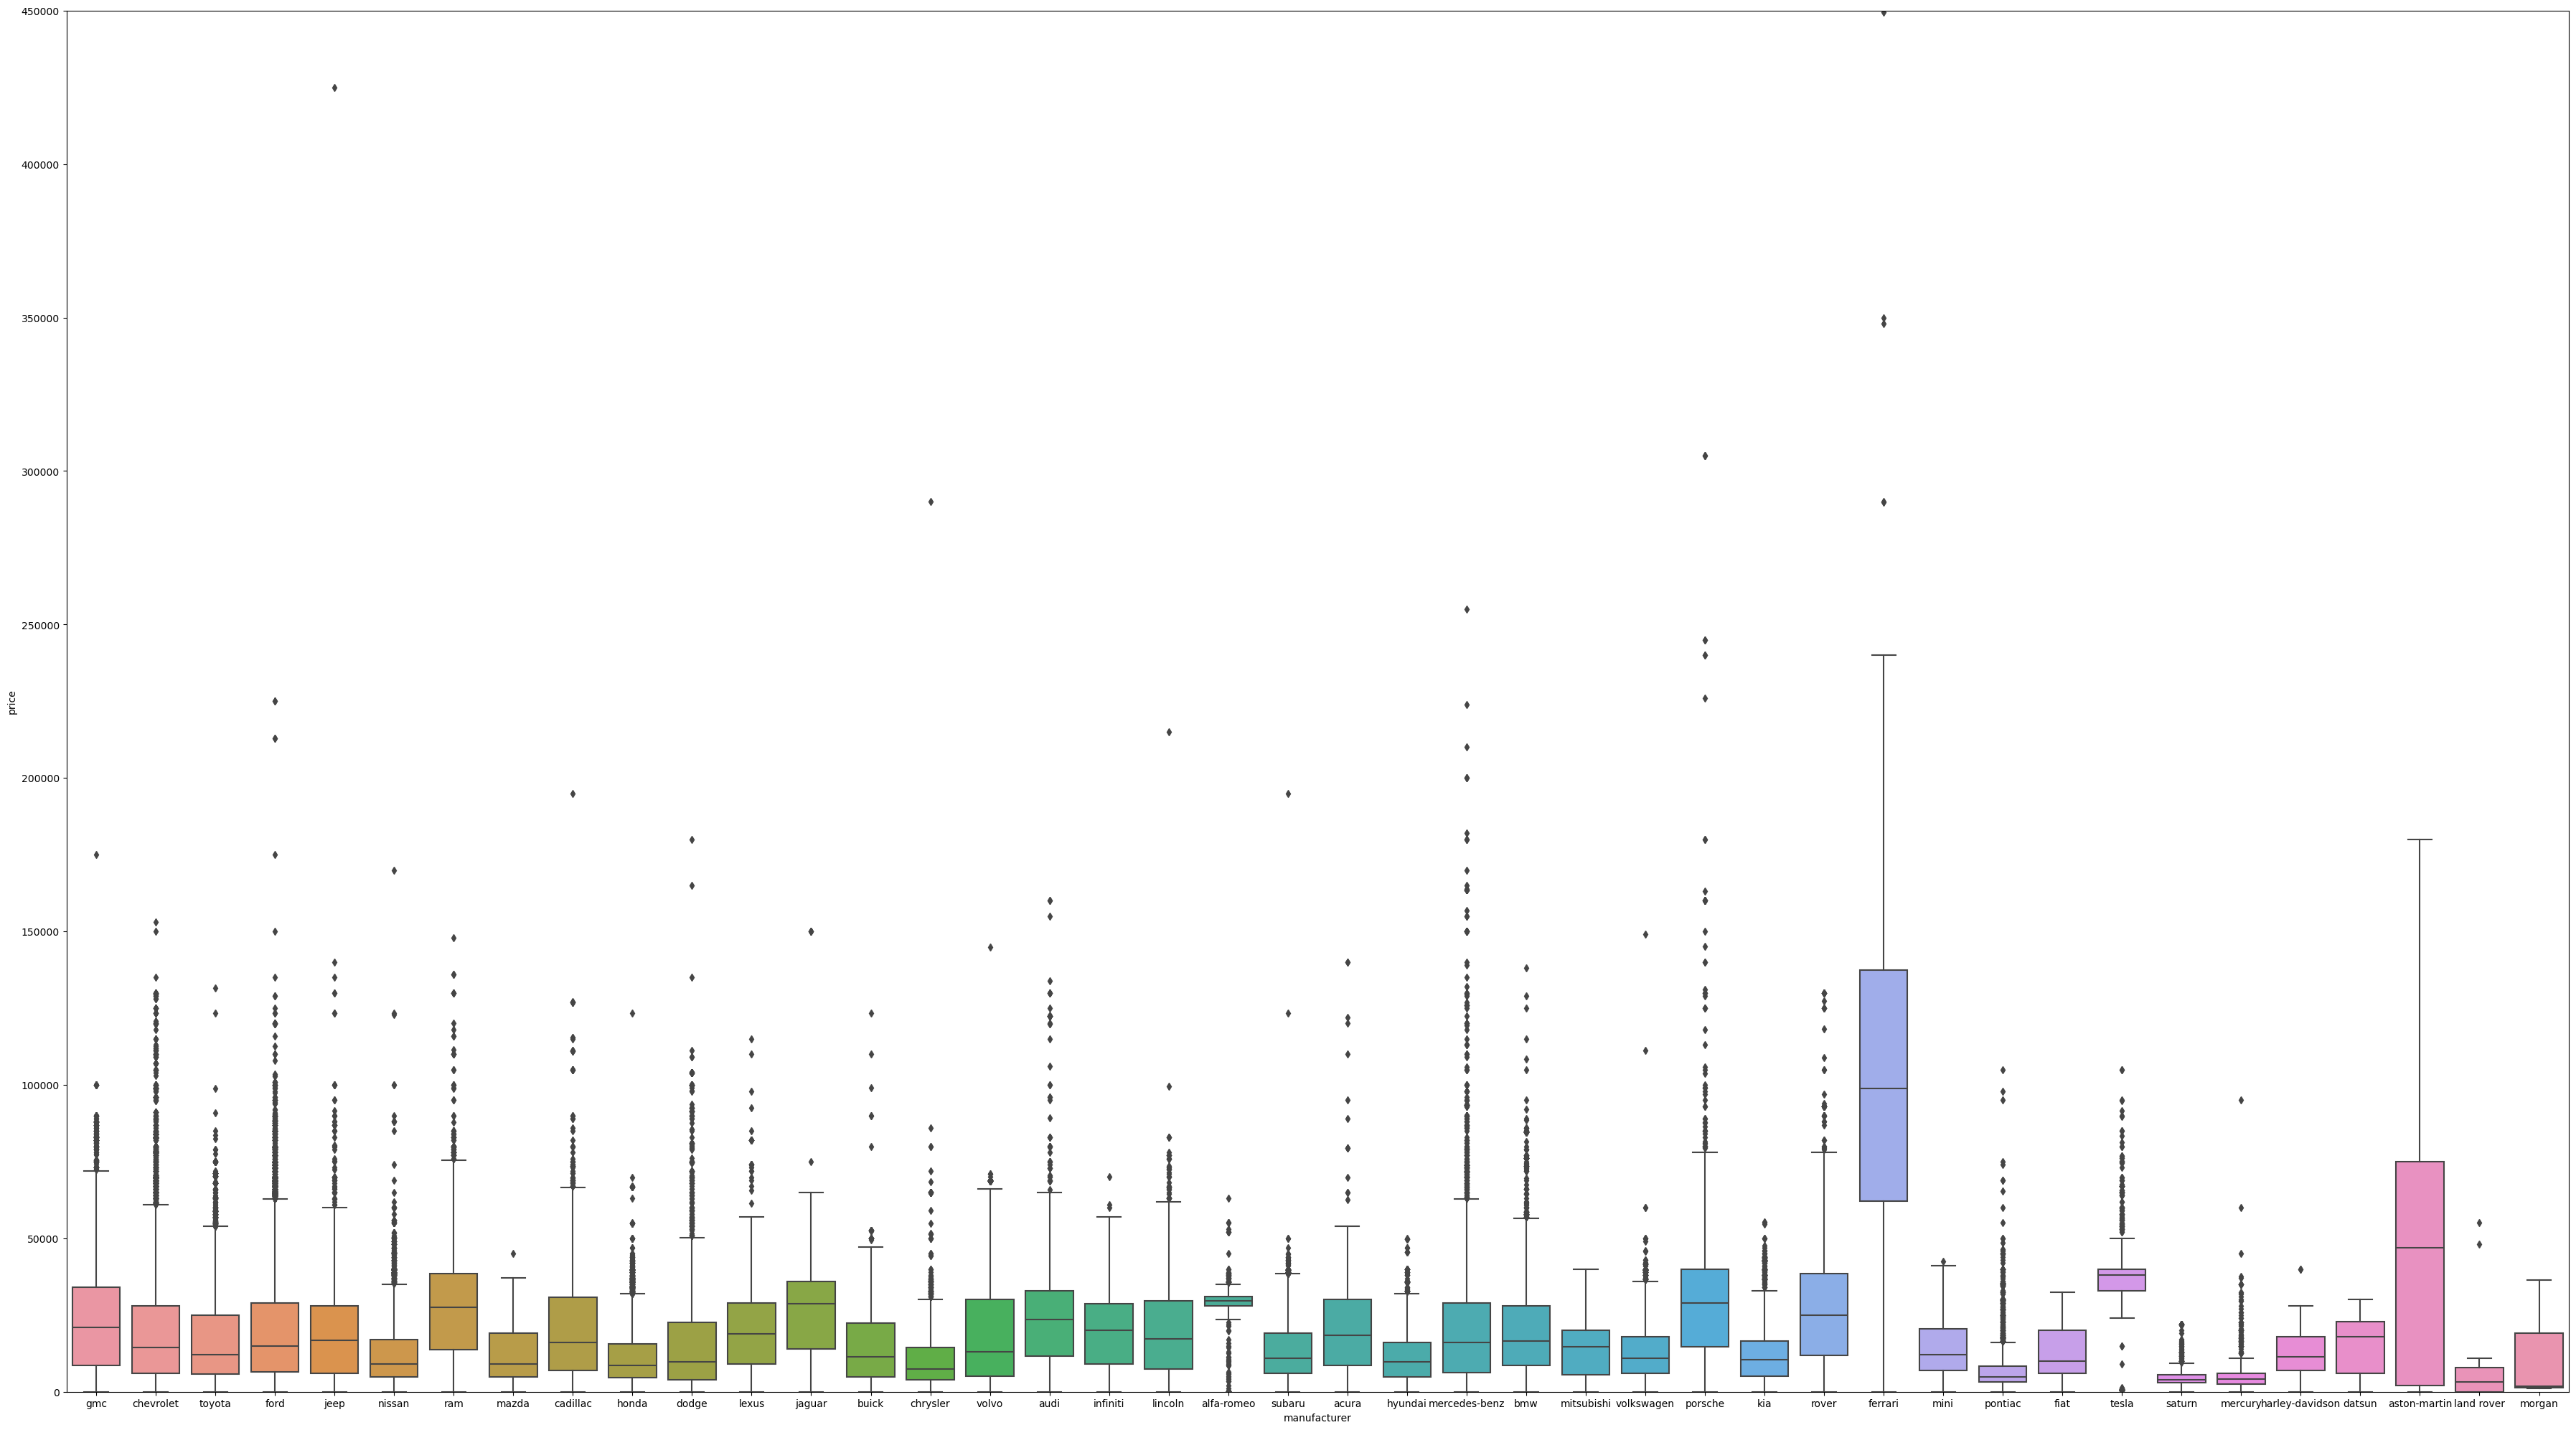

In [30]:
# Box plot Car manufacturers / Price

attrib = 'manufacturer'
data = pd.concat([cars['price'], cars[attrib]], axis=1)
f, ax = plt.subplots(figsize=(45, 25))
fig = sns.boxplot(x=attrib, y="price", data=data)
fig.axis(ymin=0, ymax=450000);
plt.savefig('./images/4_box_plot_manu_price.png')



In [31]:
"""
We can observe there is a correlation between Price and Luxury car manufacturers.
"""

'\nWe can observe there is a correlation between Price and Exotic/Luxury car manufacturers.\n'

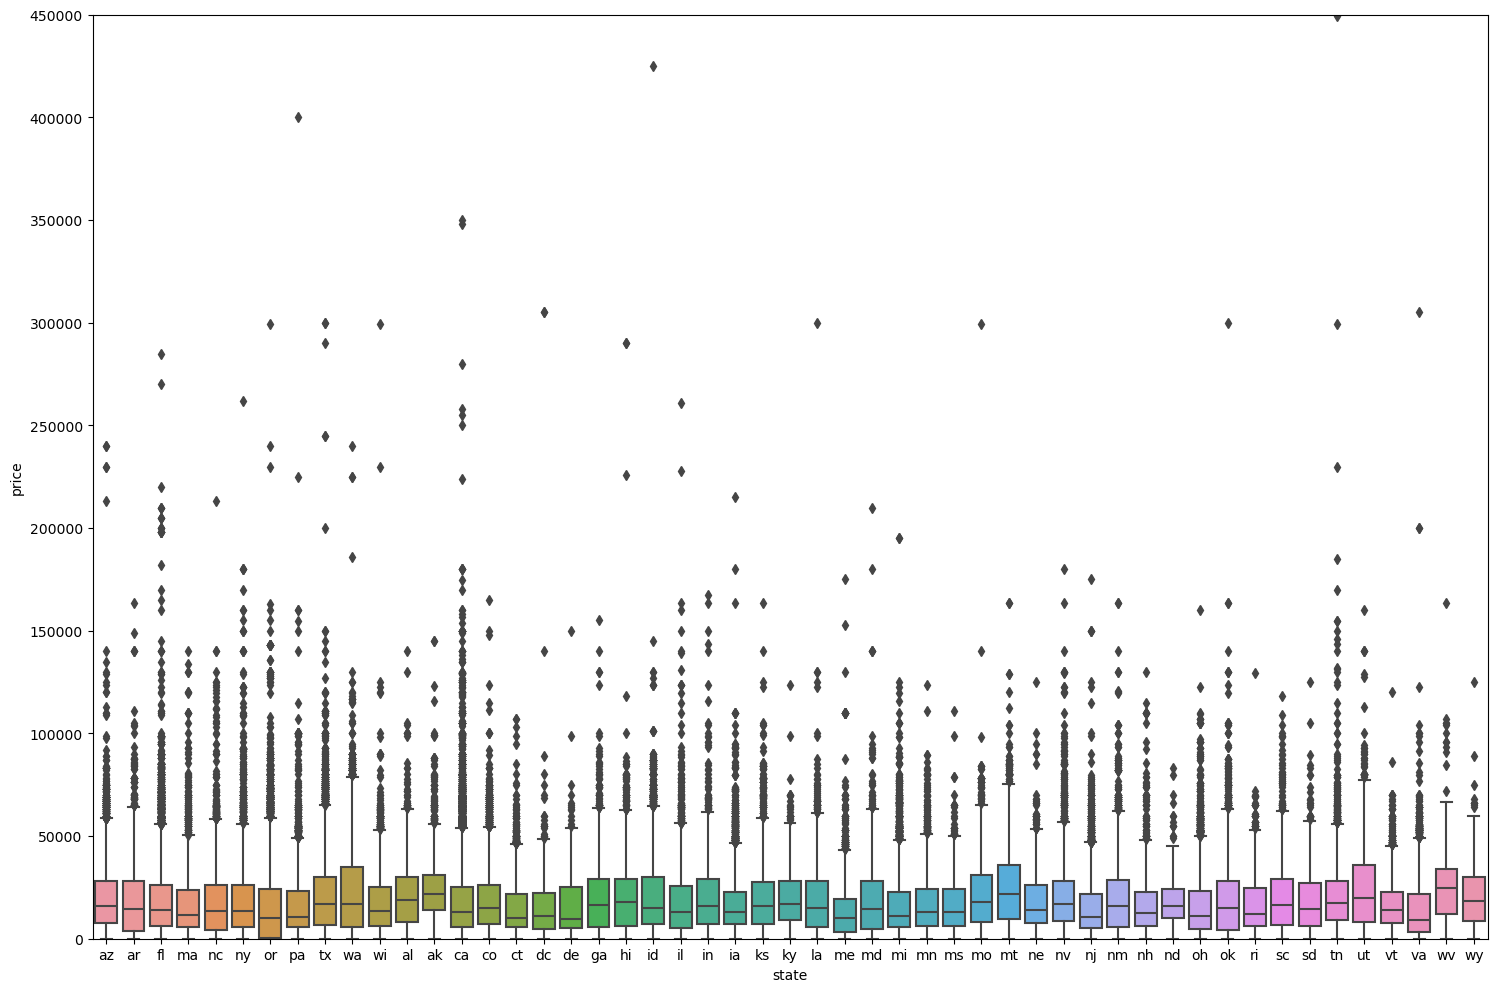

In [21]:
# Box plot State / Price

attrib = 'state'
data = pd.concat([cars['price'], cars[attrib]], axis=1)
f, ax = plt.subplots(figsize=(18, 12))
fig = sns.boxplot(x=attrib, y="price", data=data)
fig.axis(ymin=0, ymax=450000);
plt.savefig('./images/5_box_plot_state_price.png')

In [22]:
#Copying the dataframe for further cleaning/analysis
cars_copy = cars.copy()

In [23]:
# Dropping the ID column 
cars_copy = cars_copy.drop(columns='id')

In [24]:
cars_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

In [52]:
# Find most important features relative to target Price

print("Find most important features relative to target")
corr = cars_copy.corr(numeric_only=True)
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)


Find most important features relative to target
price       1.000000
year        0.022272
odometer   -0.019336
Name: price, dtype: float64


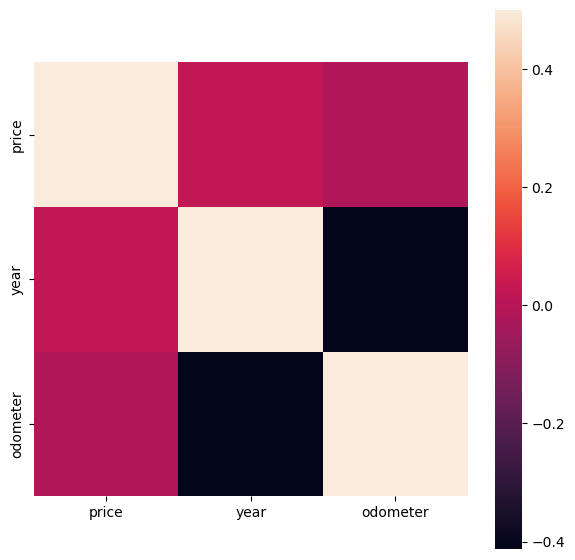

In [51]:
# Correlation matrix
corrmat = cars_copy.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.5, square=True);
plt.savefig('./images/6_corr_price.png')

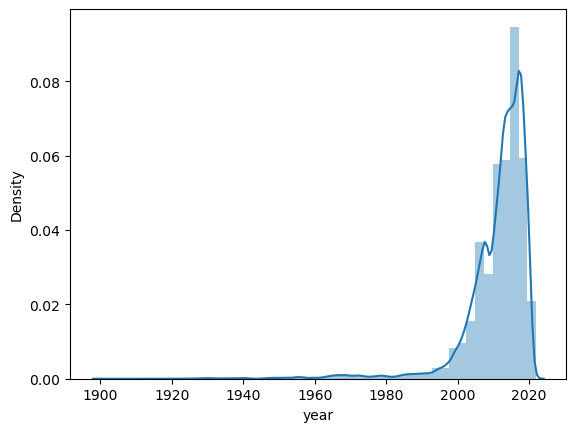

In [53]:
# Record distribution over the year
sns.distplot((cars["year"]))
plt.savefig('./images/7_dist_over_year.png')

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [36]:
#define numeric variable and categorical variable to work separatly on them
num_col=['year','odometer']
cat_cols=['VIN','region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','state']

In [37]:
check_imputer=cars_copy.copy()

#object of LabelEncoder
encoder=preprocessing.LabelEncoder()

#function to label the categorical columns ignoring null values 
def encode(data):
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#loop to label each column or categorical values into numberic
for i in tqdm(range(len(cat_cols))):
    encode(check_imputer[cat_cols[i]])

100%|██████████| 14/14 [00:02<00:00,  6.88it/s]


In [39]:
cars_copy.isnull().sum()[num_col]

year        1205
odometer    4400
dtype: int64

In [40]:
data_num=cars_copy[num_col]
imputer_num=IterativeImputer(BayesianRidge()) 
impute_data=imputer_num.fit_transform(data_num)
cars_copy[num_col]=impute_data

In [41]:
#Missing values after filling
cars_copy.isnull().sum()[num_col]

year        0
odometer    0
dtype: int64

In [45]:
#Missing values before filling
cars_copy.isnull().sum()[cat_cols] 

VIN             161042
region               0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [46]:
# Removing the records which doesnt have the VIN
cars_copy = cars_copy.dropna(axis=0, subset=['VIN'])

In [47]:
#Missing values after dropping VIN missing values
cars_copy.isnull().sum()[cat_cols]

VIN                  0
region               0
manufacturer      7732
model             1642
condition       114403
cylinders       119857
fuel              2882
title_status      8109
transmission      2458
drive            71891
size            213385
type             27836
paint_color      68960
state                0
dtype: int64

In [48]:
#Filling missing categorical columns
data_cat=cars_copy[cat_cols]
encoder=preprocessing.LabelEncoder()

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(data_cat[columns])
    imputer = IterativeImputer(BayesianRidge())
    impute_data=imputer.fit_transform(data_cat[columns].values.reshape(-1, 1))
    impute_data=impute_data.astype('int64')
    impute_data = pd.DataFrame(impute_data)
    impute_data =encoder.inverse_transform(impute_data.values.reshape(-1, 1))
    data_cat[columns]=impute_data
cars_copy[cat_cols]=data_cat  

In [49]:
#Missing values before filling
cars_copy.isnull().sum()[cat_cols]

VIN             0
region          0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

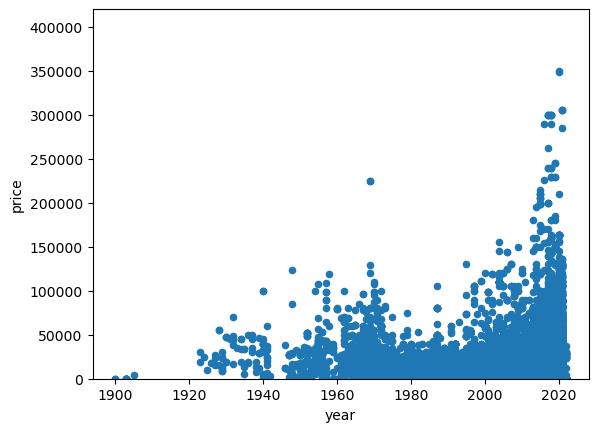

In [56]:
# Bivariate analysis Price / Year
attrib = 'year'
data = pd.concat([cars_copy['price'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='price', ylim=(0,420000))
plt.savefig('./images/8_bivariate_price_year.png')

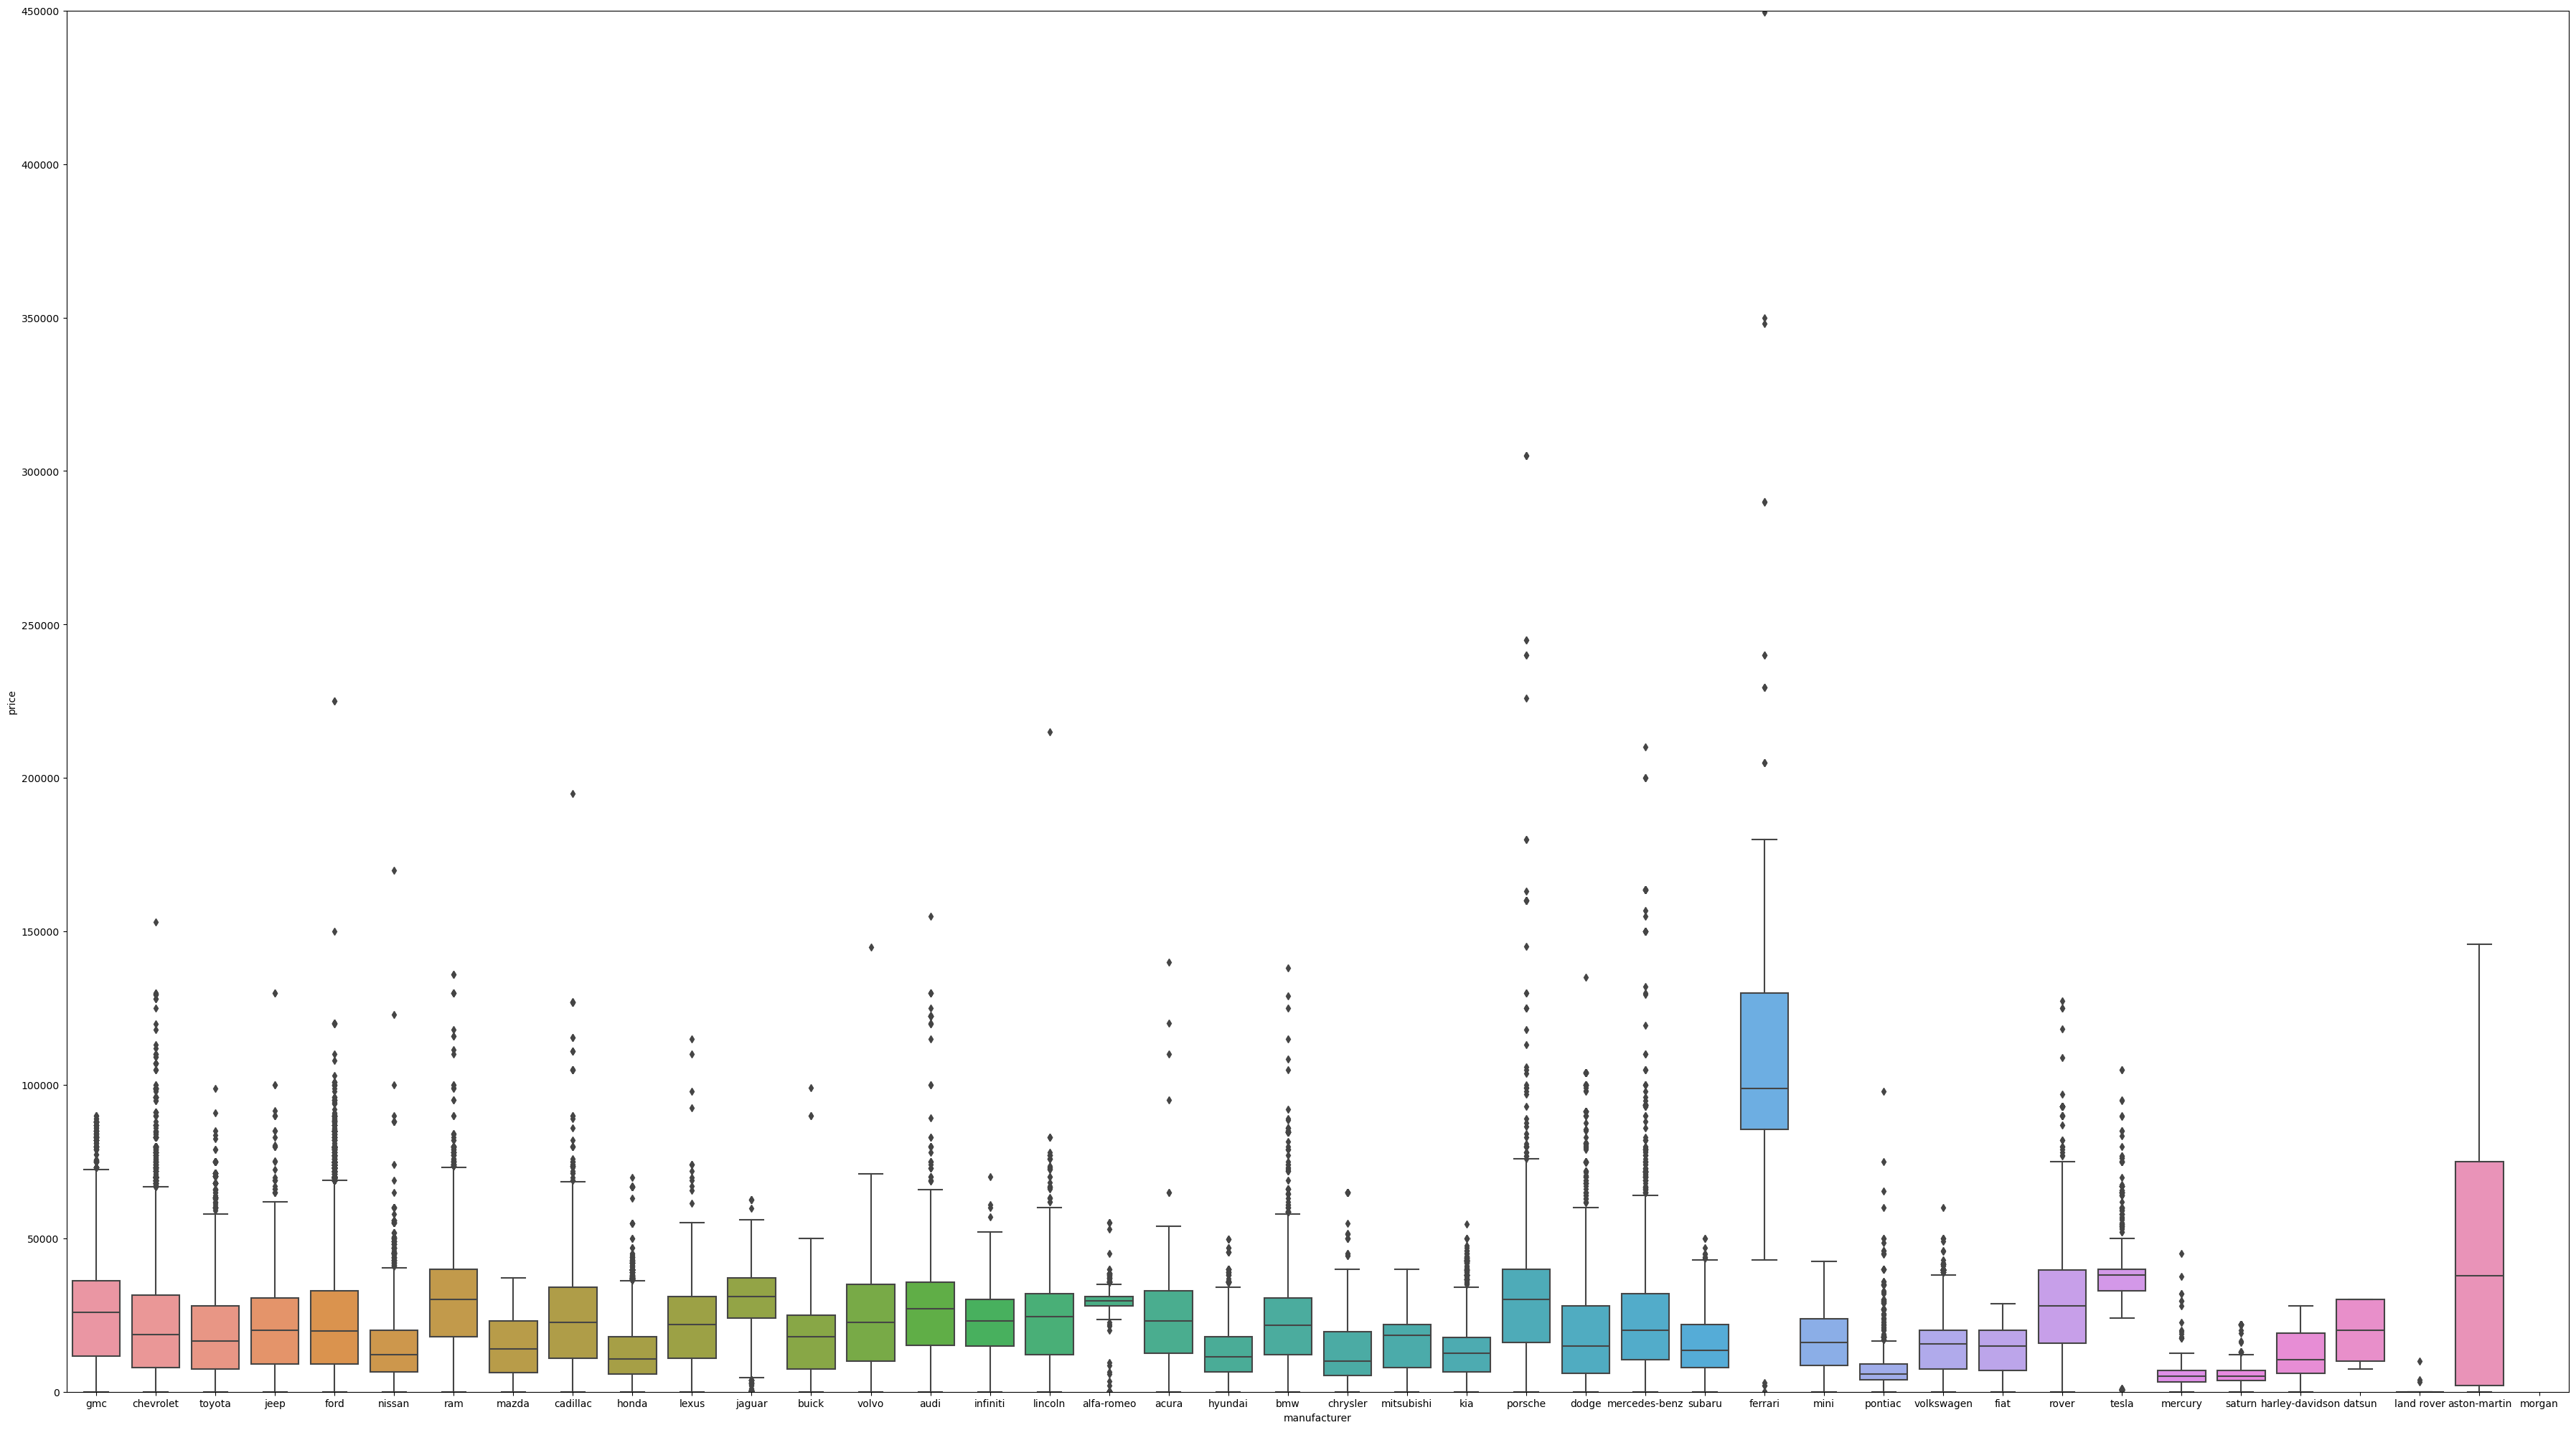

In [57]:
# Box Plot showing car manufacturer / Price range

attrib = 'manufacturer'
data = pd.concat([cars_copy['price'], cars[attrib]], axis=1)
f, ax = plt.subplots(figsize=(45, 25))
fig = sns.boxplot(x=attrib, y="price", data=data)
fig.axis(ymin=0, ymax=450000);
plt.savefig('./images/9_box_plot_manuf_price.png')

In [ ]:
# Scatter plot for numerical features
num_features = ["price", "odometer", "year"]
sns.pairplot(cars_copy[num_features])
plt.tight_layout()
plt.savefig('./images/10_scatter_plot_num_features.png')
plt.show()

In [59]:
from IPython.display import display,Latex
outliers_condi=Latex(r" $\textbf{W𝑒 𝑐𝑎𝑛 𝑠𝑎𝑦 $𝑥_1$ or $x_2$ 𝑖𝑠 𝑜𝑢𝑡𝑙𝑖𝑒𝑟𝑠 if }\\ x_1 < Q1 - 1.5*IQR \\ or\\ x_2 > Q3+1.5*IQR $")
outliers_info=Latex(r"$L_{p} = \frac{p}{100}(n+1) = i_p.f_p \\ where \,\, i_p \,\, is \,\, integer \,\, part \,\, of \,\, L_p \,\, and \,\, f_p \,\, is \,\, fractional \,\, part \,\, of \,\, L_p \\ Q1 = Y_{25} = x_{i_p} + f_p*(x_{i_{p+1}}-x_{i_p}) \\ Q3 = Y_{75} = x_{i_p} + f_p*(x_{i_{p+1}}-x_{i_p}) \\ IQR = Q3-Q1 \\ x_1 = Q1 - 1.5*IQR \,\,and\,\, x_2 = Q3+1.5*IQR $")

In [60]:
display(outliers_info)
display(outliers_condi)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [61]:
#it will return the range of the variables and the values outside this range will be outliers
def outliers(arr,col):
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    #q1,q3=(arr[col].quantile([0.25,0.75]))
    
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

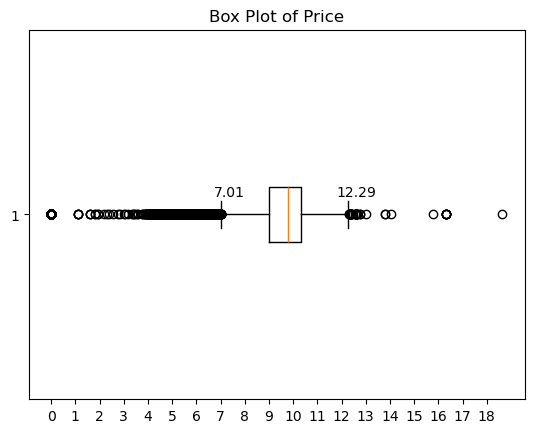

In [71]:
# Price
def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)
cars_copy['logprice'] = np.log(cars_copy['price'])
x=cars_copy['logprice']
price_range=list(range(0,int(max(cars_copy['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(cars_copy)[0]-0.3,1.05,str(round(min_max_price(cars_copy)[0],2)))
plt.text(min_max_price(cars_copy)[1]-0.5,1.05,str(round(min_max_price(cars_copy)[1],2)))
plt.title("Box Plot of Price")
plt.savefig('./images/11_box_plot_price.png')
plt.show()

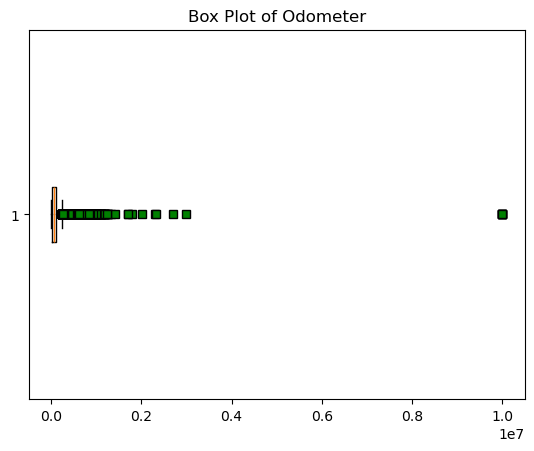

In [73]:
# Odometer
fig, ax1 = plt.subplots()
ax1.set_title('Box Plot of Odometer')
ax1.boxplot(cars_copy['odometer'], vert=False, flierprops=red_square)
plt.savefig('./images/12_box_plot_odometer.png')
plt.show()

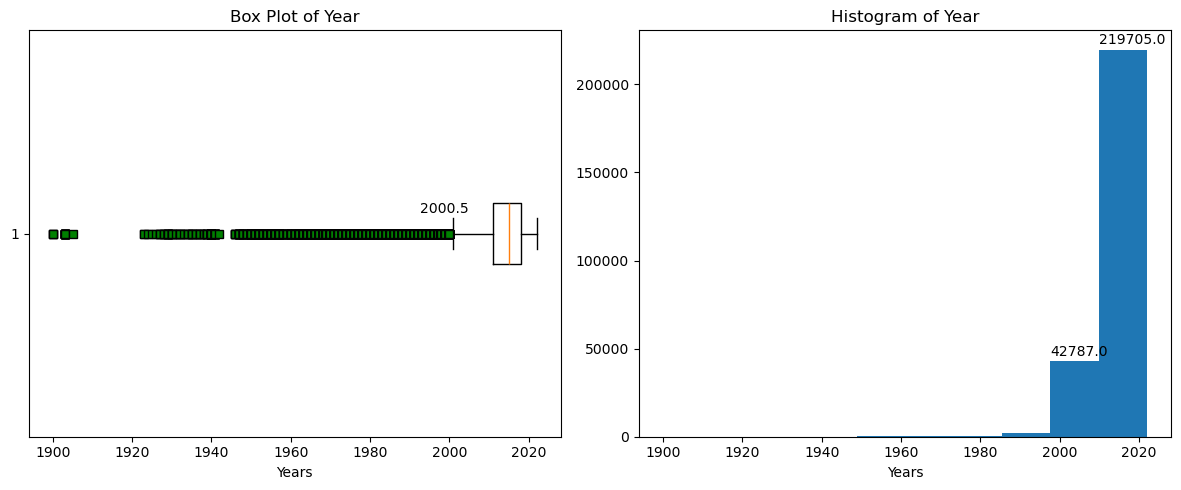

In [74]:
#3.3) Year
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#ploting boxplot
o1,o2=outliers(cars_copy,'year')
ax1.boxplot(sorted(cars_copy['year']), vert=False, flierprops=red_square)
ax1.set_xlabel("Years")
ax1.set_title("Box Plot of Year")
ax1.text(o1-8,1.05,str(round(o1,2)))

#ploting histogram
hist,bins=np.histogram(cars_copy['year'])
n, bins, patches = ax2.hist(x=cars_copy['year'], bins=bins)
ax2.set_xlabel("Years")
ax2.set_title("Histogram of Year")
for i in range(len(n)):
    if(n[i]>2000):
        ax2.text(bins[i],n[i]+3000,str(n[i]))

plt.tight_layout()
plt.savefig('./images/13_box_hist_plot_year.png')
plt.show()

In [147]:
cars_clean=cars_copy.copy()
# Any  duplicated rows.
cars_clean.duplicated('VIN').sum()

147592

In [149]:
cars_clean = cars_clean.drop_duplicates(subset='VIN', keep='last')

In [150]:
# Any  duplicated rows.
cars_clean.duplicated('VIN').sum()

0

In [151]:
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118246 entries, 116 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        118246 non-null  object 
 1   price         118246 non-null  int64  
 2   year          118246 non-null  float64
 3   manufacturer  118246 non-null  object 
 4   model         118246 non-null  object 
 5   condition     118246 non-null  object 
 6   cylinders     118246 non-null  object 
 7   fuel          118246 non-null  object 
 8   odometer      118246 non-null  float64
 9   title_status  118246 non-null  object 
 10  transmission  118246 non-null  object 
 11  VIN           118246 non-null  object 
 12  drive         118246 non-null  object 
 13  size          118246 non-null  object 
 14  type          118246 non-null  object 
 15  paint_color   118246 non-null  object 
 16  state         118246 non-null  object 
 17  logprice      118246 non-null  float64
dtypes: floa

In [152]:
#removing outliers 

out=np.array(['logprice','odometer','year'])
for col in out:
    o1,o2=outliers(cars_clean,col)
    df_new=cars_clean[(cars_clean[col]>=o1) & (cars_clean[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
cars_clean=cars_clean[cars_clean['price']!=0]
cars_clean.drop('logprice',axis=1,inplace=True)

IQR of logprice = 6.620907026260475 12.163416469974123
IQR of odometer = -86480.5 253555.5
IQR of year = 1999.5 2027.5


In [153]:
cars_clean.tail(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,full-size,sedan,grey,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,5 cylinders,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,full-size,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,5 cylinders,diesel,4174.0,clean,other,1GYFZFR46LF088296,4wd,full-size,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,full-size,sedan,silver,wy
426879,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,5 cylinders,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,full-size,coupe,grey,wy


In [101]:
print("Shape before process=",cars_copy.shape)
print("Shape After process=",cars_clean.shape)
diff=cars_copy.shape[0]-cars_clean.shape[0]
print("Total {} rows and {} cols removed".format(diff,cars_copy.shape[1]-cars_clean.shape[1]))


Shape before process= (265838, 18)
Shape After process= (105438, 17)
Total 160400 rows and 1 cols removed


In [154]:
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105438 entries, 116 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        105438 non-null  object 
 1   price         105438 non-null  int64  
 2   year          105438 non-null  float64
 3   manufacturer  105438 non-null  object 
 4   model         105438 non-null  object 
 5   condition     105438 non-null  object 
 6   cylinders     105438 non-null  object 
 7   fuel          105438 non-null  object 
 8   odometer      105438 non-null  float64
 9   title_status  105438 non-null  object 
 10  transmission  105438 non-null  object 
 11  VIN           105438 non-null  object 
 12  drive         105438 non-null  object 
 13  size          105438 non-null  object 
 14  type          105438 non-null  object 
 15  paint_color   105438 non-null  object 
 16  state         105438 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 1

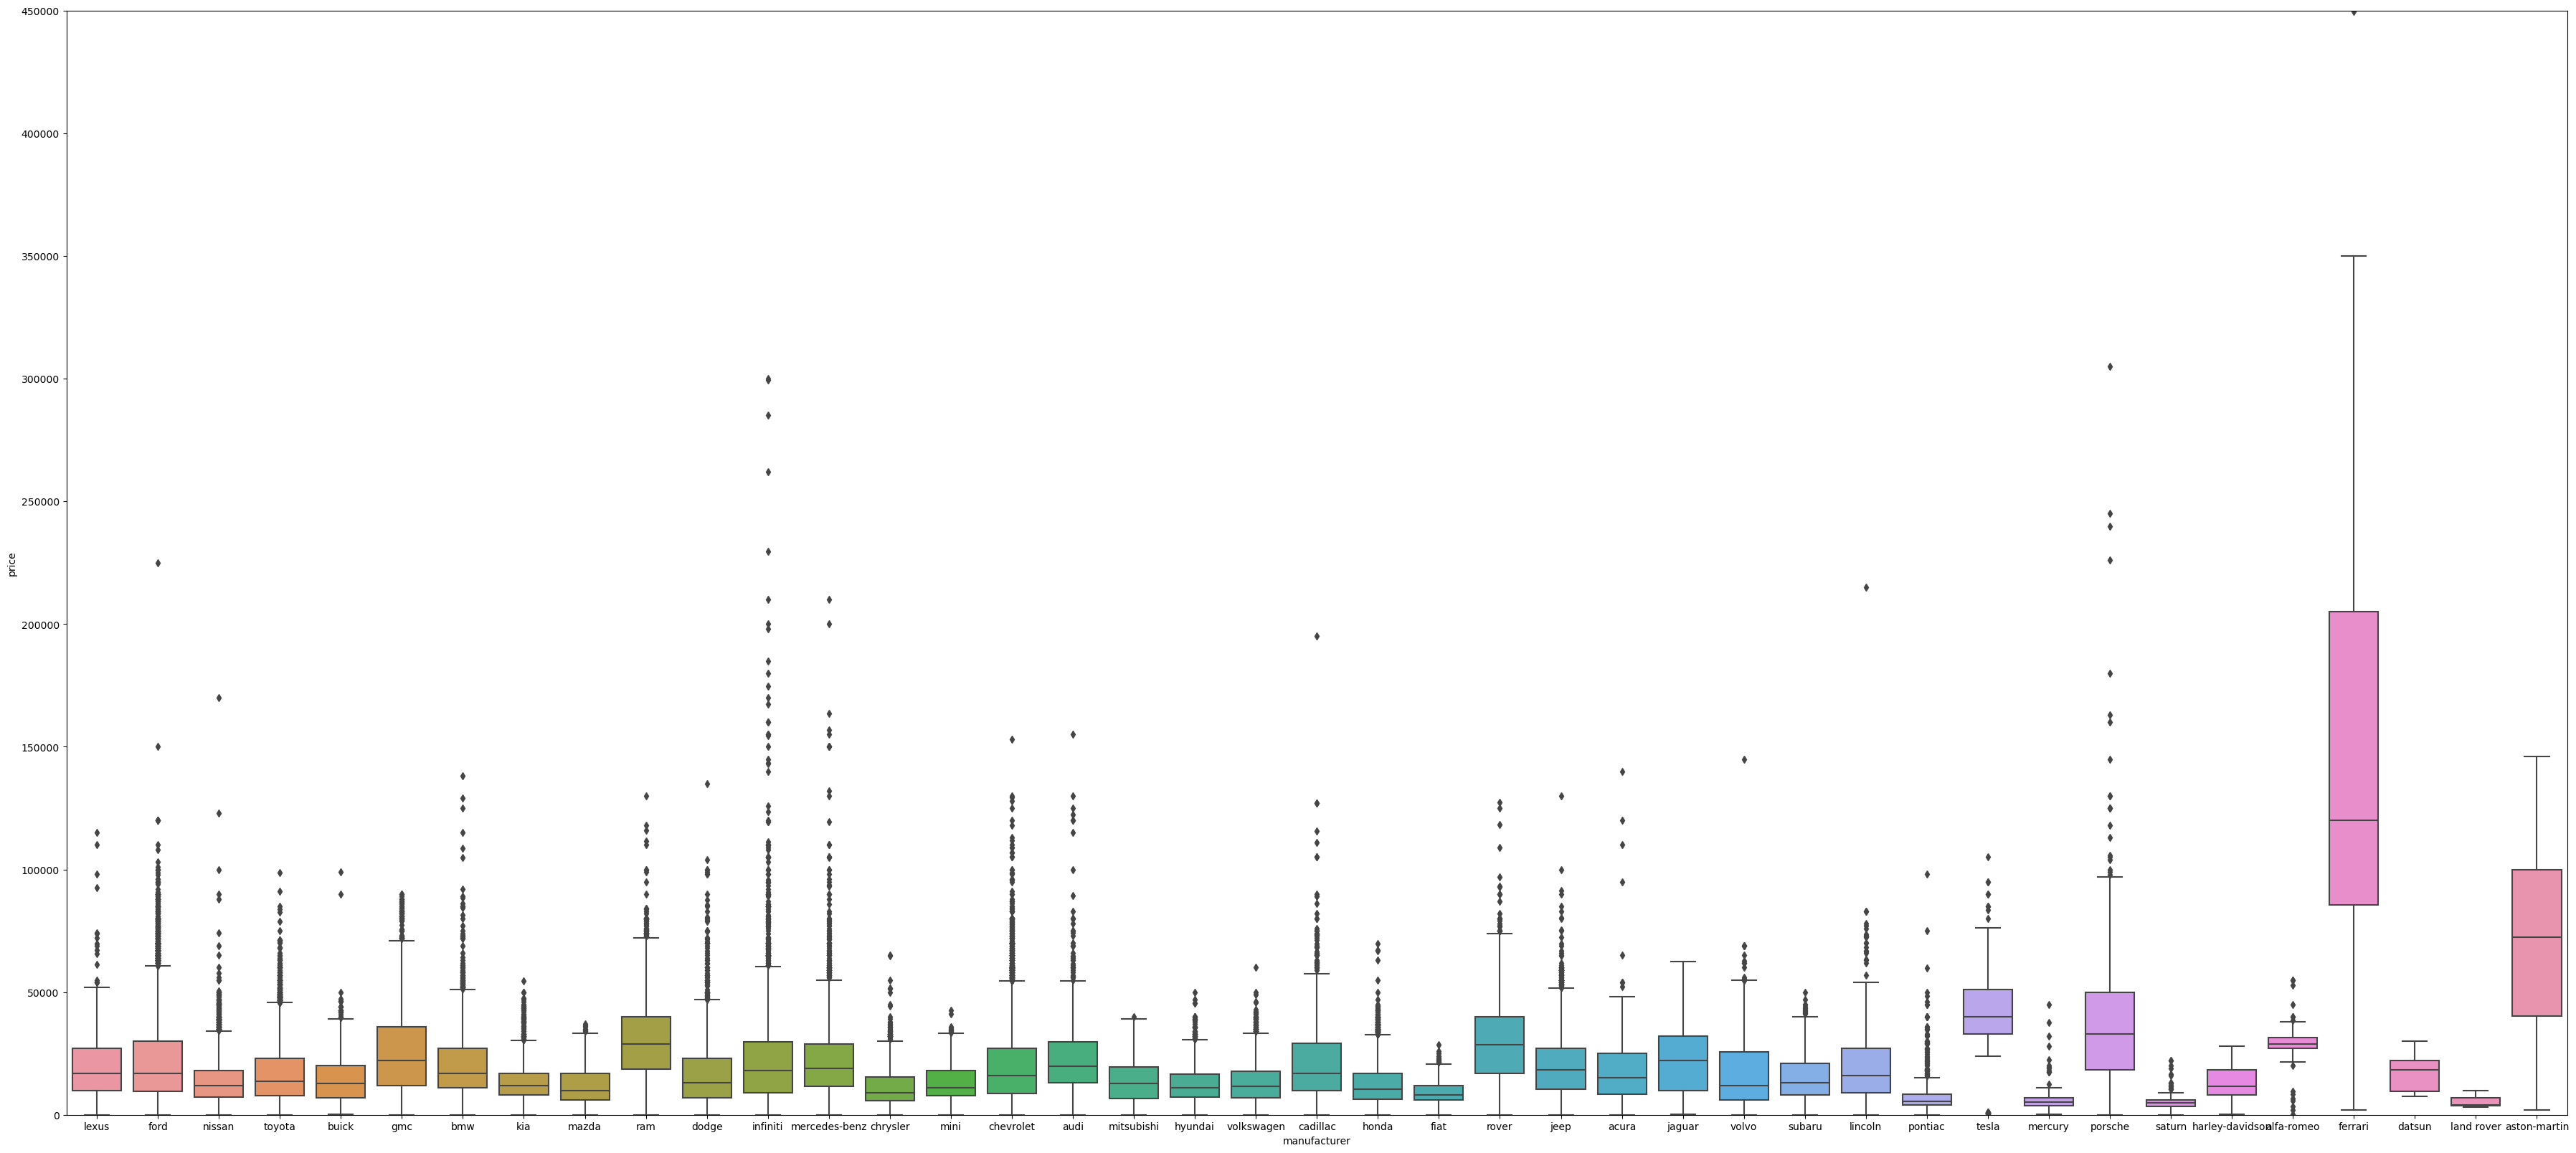

In [103]:

# Box Plot showing car manufacturer / Price range after cleaning

attrib = 'manufacturer'
data = pd.concat([cars_clean['price'], cars_clean[attrib]], axis=1)
f, ax = plt.subplots(figsize=(45, 20))
fig = sns.boxplot(x=attrib, y="price", data=data)
fig.axis(ymin=0, ymax=450000)
plt.savefig('./images/14_box_plot_manuf_price.png')

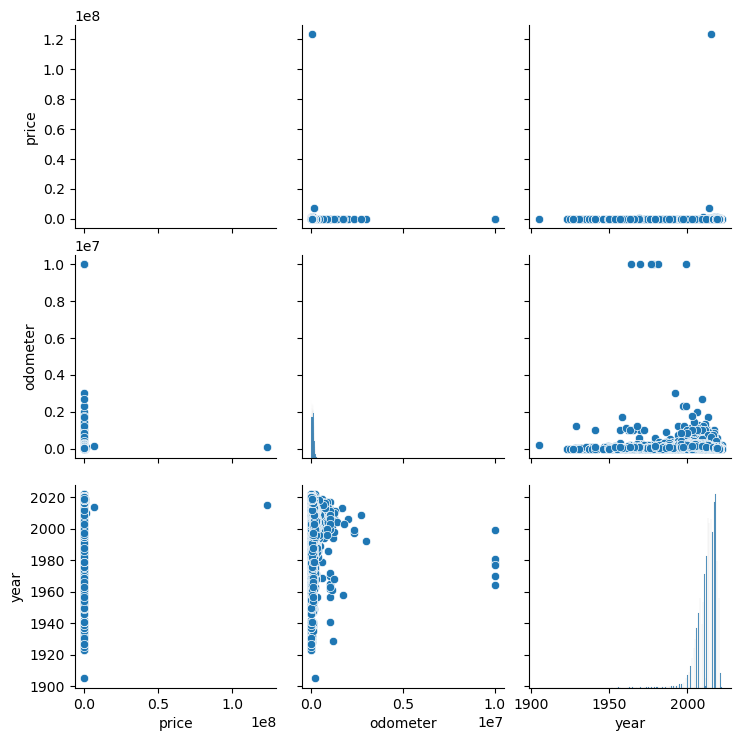

In [104]:
# Scatter plot for numerical features
num_features = ["price", "odometer", "year"]
sns.pairplot(cars_clean[num_features], size = 2.5)
plt.savefig('./images/15_scatter_plot_num_features.png')
plt.show()


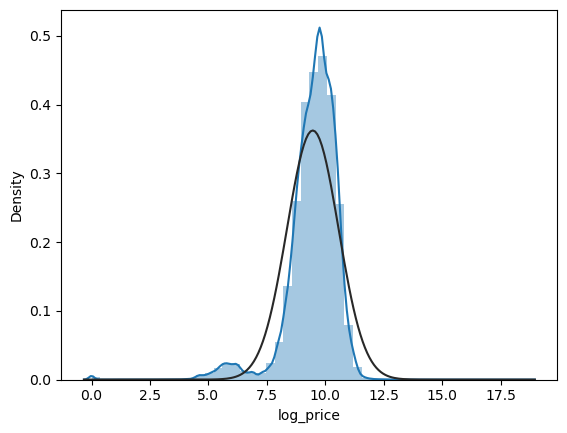

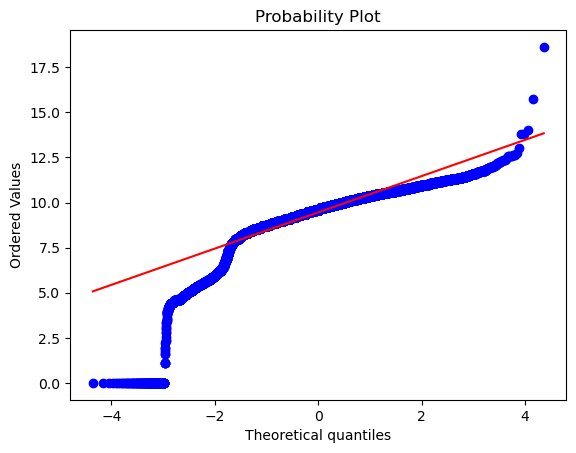

In [106]:
#transformed histogram and normal probability plot
sns.distplot(cars_clean['log_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(cars_clean['log_price'], plot=plt)
plt.savefig('./images/16_hist_log_price.png')

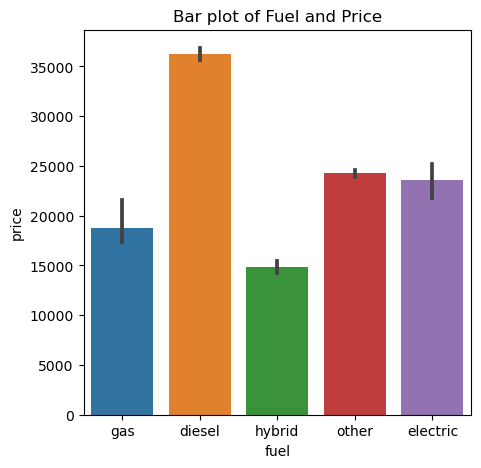

In [107]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='fuel',y='price',data=cars_clean,ax=axs)
axs.set_title('Bar plot of Fuel and Price')
plt.savefig('./images/17_bar_fuel_price.png')
plt.show()

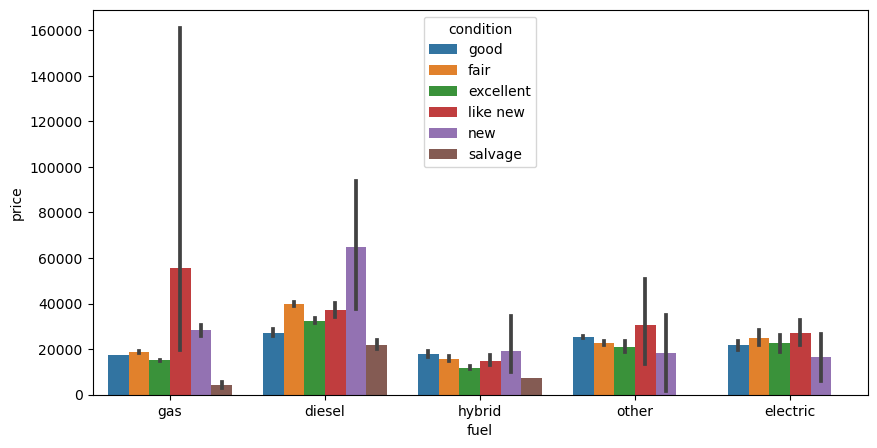

In [108]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=cars_clean)
plt.savefig('./images/18_bar_cond_fuel_price.png')
plt.show()

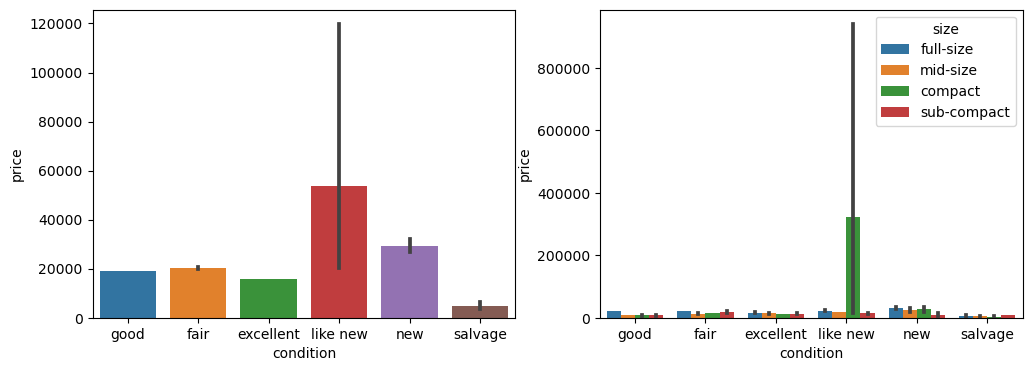

In [109]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='condition',y='price',data=cars_clean,ax=axs[0])
sns.barplot(x='condition',y='price',hue='size',data=cars_clean,ax=axs[1])
plt.savefig('./images/19_bar_cond_price_size.png')
plt.show()

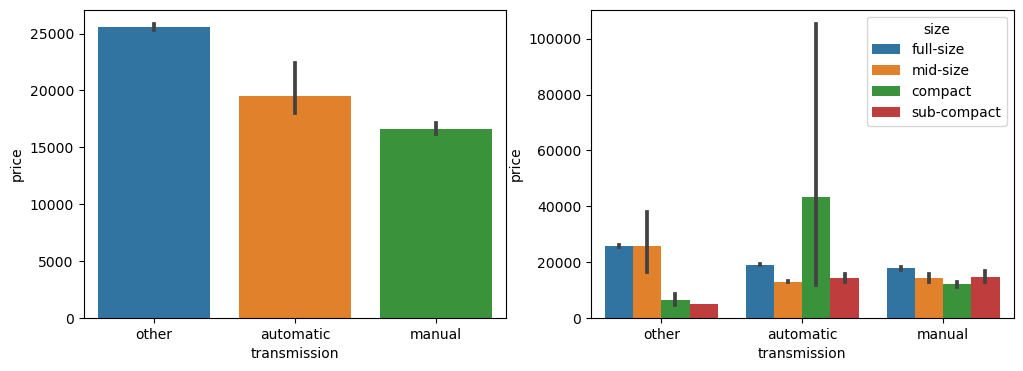

In [110]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='transmission',y='price',data=cars_clean,ax=axs[0])
sns.barplot(x='transmission',y='price',hue='size',data=cars_clean,ax=axs[1])
plt.savefig('./images/20_bar_transmission_price_size.png')
plt.show()

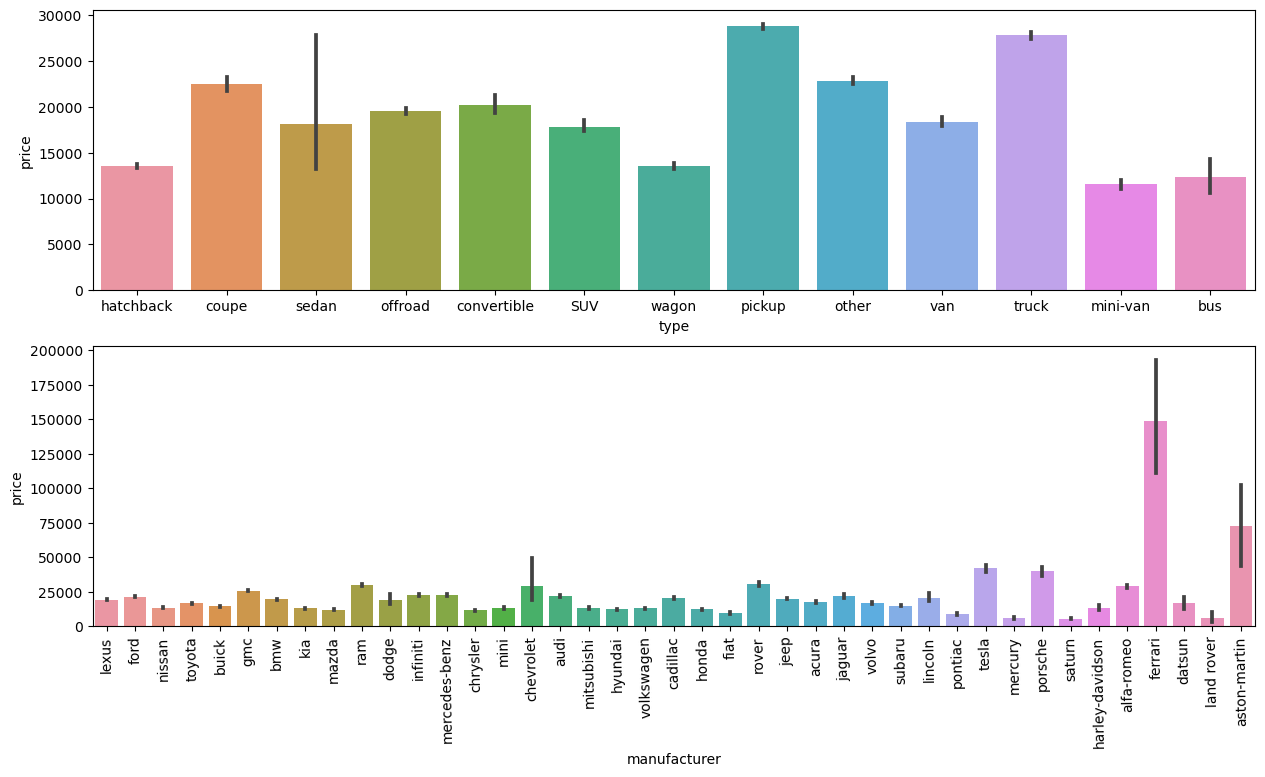

In [111]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=cars_clean,ax=axs[0])
sns.barplot(x='manufacturer',y='price',data=cars_clean,ax=axs[1])
axs[1].set_xticklabels(cars_clean.manufacturer.unique(),rotation=91)
plt.savefig('./images/21_bar_manuf_type_price.png')
plt.show()

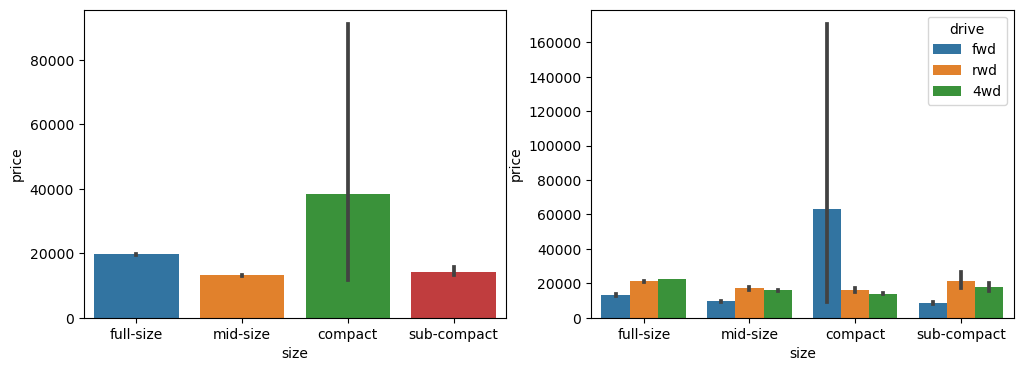

In [112]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='size',y='price',data=cars_clean,ax=axs[0])
sns.barplot(x='size',y='price',hue='drive',data=cars_clean,ax=axs[1])
plt.savefig('./images/22_bar_size_price.png')
plt.show()

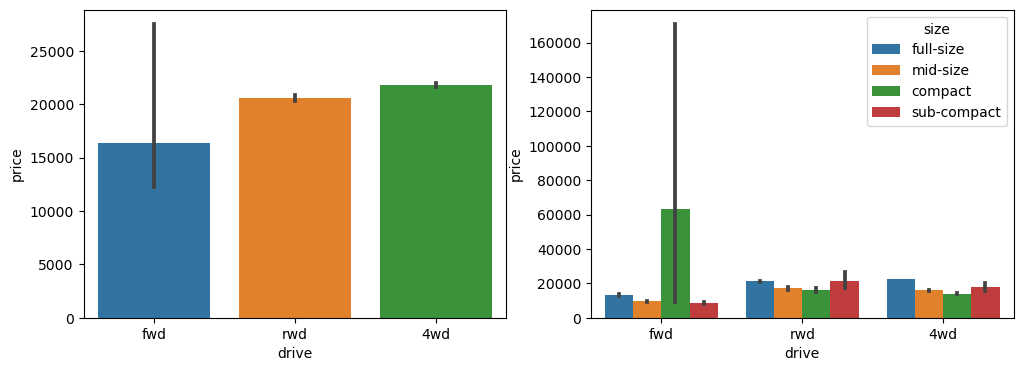

In [113]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='drive',y='price',data=cars_clean,ax=axs[0])
sns.barplot(x='drive',y='price',hue='size',data=cars_clean,ax=axs[1])
plt.savefig('./images/23_drive_price.png')
plt.show()

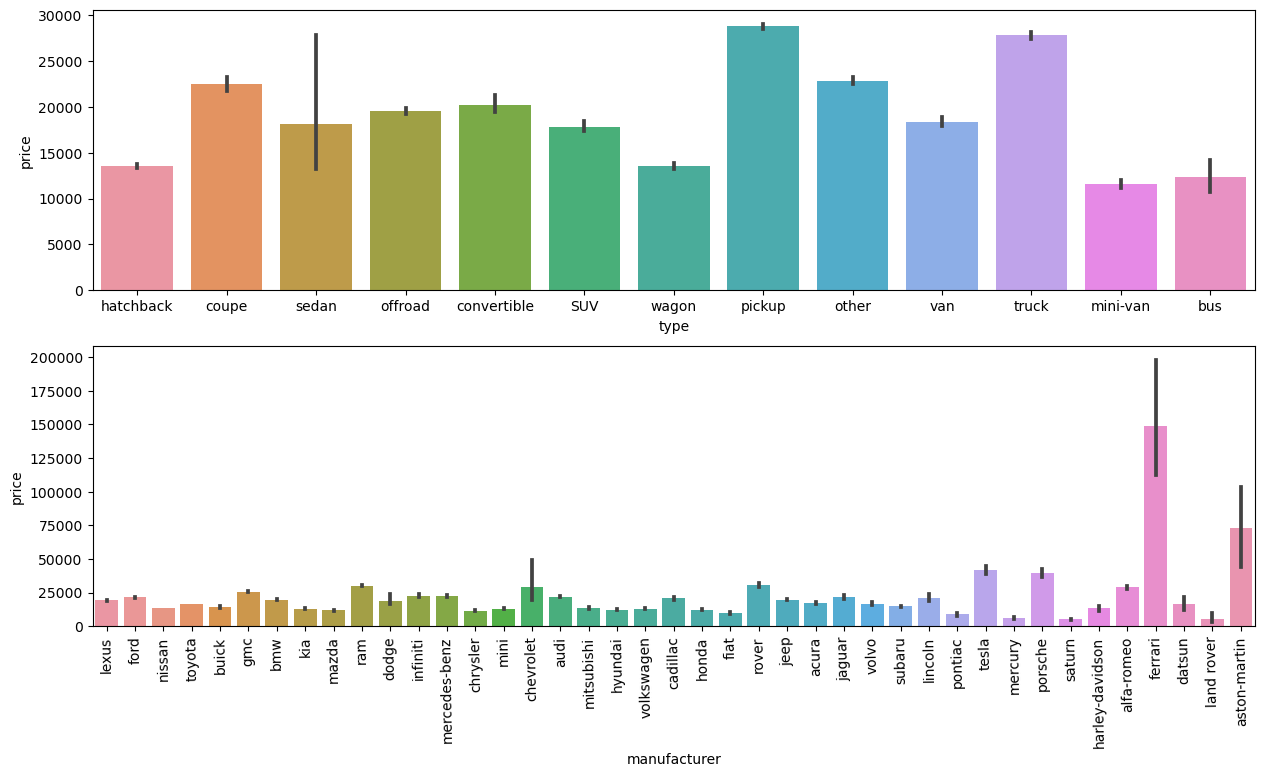

In [114]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=cars_clean,ax=axs[0])
sns.barplot(x='manufacturer',y='price',data=cars_clean,ax=axs[1])
axs[1].set_xticklabels(cars_clean.manufacturer.unique(),rotation=91)
plt.savefig('./images/24_manuf_type_price.png')
plt.show()

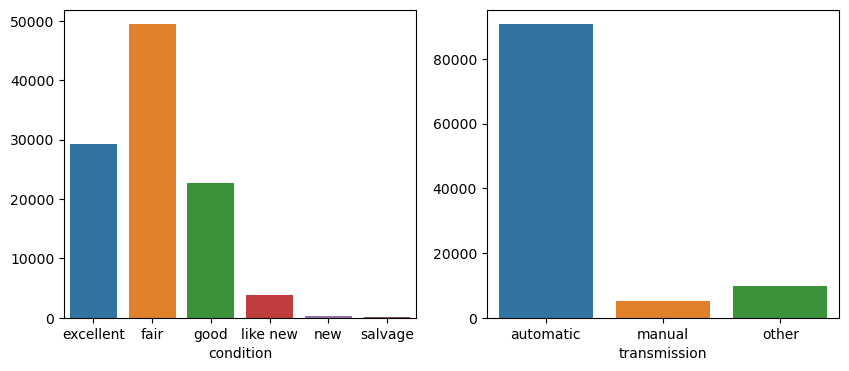

In [115]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(10,4)
sns.barplot(x=cars_clean.groupby('condition').count()['price'].index,
            y=cars_clean.groupby('condition').count()['price'].values,
            ax=axs[0])
sns.barplot(x=cars_clean.groupby('transmission').count()['price'].index,
            y=cars_clean.groupby('transmission').count()['price'].values,
            ax=axs[1])
plt.savefig('./images/25_cond_no_of_cars.png')
plt.show()

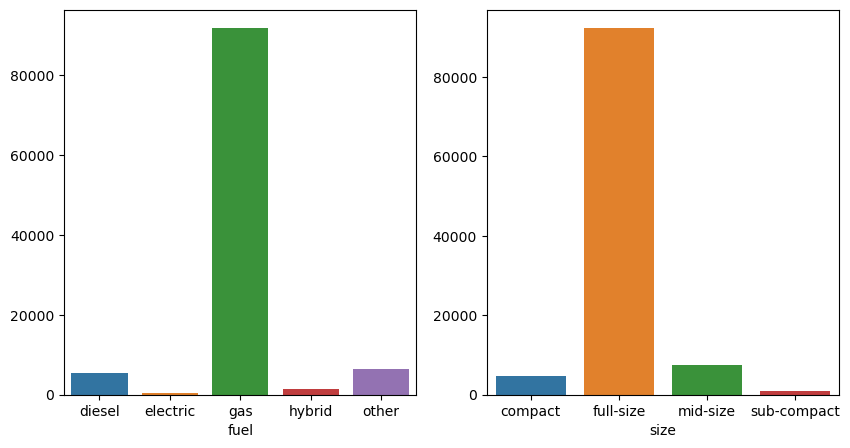

In [116]:
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(10,5)
sns.barplot(x=cars_clean.groupby('fuel').count()['price'].index,
            y=cars_clean.groupby('fuel').count()['price'].values,
            ax=axs[0])
sns.barplot(x=cars_clean.groupby('size').count()['price'].index,
            y=cars_clean.groupby('size').count()['price'].values,
            ax=axs[1])
plt.savefig('./images/26_size_fuel_no_of_cars.png')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [155]:
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105438 entries, 116 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        105438 non-null  object 
 1   price         105438 non-null  int64  
 2   year          105438 non-null  float64
 3   manufacturer  105438 non-null  object 
 4   model         105438 non-null  object 
 5   condition     105438 non-null  object 
 6   cylinders     105438 non-null  object 
 7   fuel          105438 non-null  object 
 8   odometer      105438 non-null  float64
 9   title_status  105438 non-null  object 
 10  transmission  105438 non-null  object 
 11  VIN           105438 non-null  object 
 12  drive         105438 non-null  object 
 13  size          105438 non-null  object 
 14  type          105438 non-null  object 
 15  paint_color   105438 non-null  object 
 16  state         105438 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 1

In [156]:
le=preprocessing.LabelEncoder()
cars_clean[cat_cols]=cars_clean[cat_cols].apply(le.fit_transform)

In [157]:
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105438 entries, 116 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        105438 non-null  int64  
 1   price         105438 non-null  int64  
 2   year          105438 non-null  float64
 3   manufacturer  105438 non-null  int64  
 4   model         105438 non-null  int64  
 5   condition     105438 non-null  int64  
 6   cylinders     105438 non-null  int64  
 7   fuel          105438 non-null  int64  
 8   odometer      105438 non-null  float64
 9   title_status  105438 non-null  int64  
 10  transmission  105438 non-null  int64  
 11  VIN           105438 non-null  int64  
 12  drive         105438 non-null  int64  
 13  size          105438 non-null  int64  
 14  type          105438 non-null  int64  
 15  paint_color   105438 non-null  int64  
 16  state         105438 non-null  int64  
dtypes: float64(2), int64(15)
memory usage: 14.5 MB


In [158]:
cars_clean.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
116,16,26990,2016.0,23,10860,2,4,2,31363.0,0,2,87938,1,1,4,10,1
187,29,4500,2008.0,13,10623,1,5,2,187016.0,0,0,41059,2,1,3,8,1
190,29,4299,2007.0,30,12904,1,3,2,189321.0,0,0,59093,1,1,9,9,1
199,29,16988,2008.0,38,7909,1,4,2,188099.0,0,0,85487,0,1,6,5,1
200,29,16988,2018.0,30,3282,1,4,2,57517.0,0,0,38638,1,1,6,9,1


In [159]:
#scaling numerical data

norm = StandardScaler()
cars_clean['price'] = np.log(cars_clean['price'])
cars_clean['odometer'] = norm.fit_transform(np.array(cars_clean['odometer']).reshape(-1,1))
cars_clean['year'] = norm.fit_transform(np.array(cars_clean['year']).reshape(-1,1))
cars_clean['model'] = norm.fit_transform(np.array(cars_clean['model']).reshape(-1,1))

#scaling target variable
q1,q3=(cars_clean['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
cars_clean=cars_clean[(cars_clean.price>=o1) & (cars_clean.price<=o2)]

cars_clean['region'] = norm.fit_transform(np.array(cars_clean['region']).reshape(-1,1))


In [160]:
cars_clean.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
116,-1.603431,10.203222,0.518939,23,0.486112,2,4,2,-0.610538,0,2,87938,1,1,4,10,1
187,-1.493471,8.411833,-0.632125,13,0.433136,1,5,2,0.950259,0,0,41059,2,1,3,8,1
190,-1.493471,8.366138,-0.776008,30,0.942996,1,3,2,0.973373,0,0,59093,1,1,9,9,1
199,-1.493471,9.740262,-0.632125,38,-0.173509,1,4,2,0.961119,0,0,85487,0,1,6,5,1
200,-1.493471,9.740262,0.806705,30,-1.207758,1,4,2,-0.348281,0,0,38638,1,1,6,9,1


In [169]:
#cars_clean.drop(columns='VIN', inplace=True)

In [161]:
#cars_clean_copy = cars_clean.copy()

In [164]:
#cars_clean = cars_clean_copy.copy()
cars_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100923 entries, 116 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        100923 non-null  float64
 1   price         100923 non-null  float64
 2   year          100923 non-null  float64
 3   manufacturer  100923 non-null  int64  
 4   model         100923 non-null  float64
 5   condition     100923 non-null  int64  
 6   cylinders     100923 non-null  int64  
 7   fuel          100923 non-null  int64  
 8   odometer      100923 non-null  float64
 9   title_status  100923 non-null  int64  
 10  transmission  100923 non-null  int64  
 11  VIN           100923 non-null  int64  
 12  drive         100923 non-null  int64  
 13  size          100923 non-null  int64  
 14  type          100923 non-null  int64  
 15  paint_color   100923 non-null  int64  
 16  state         100923 non-null  int64  
dtypes: float64(5), int64(12)
memory usage: 13.9 MB


In [163]:
#Moving the price column to last 
last_column = cars_clean.pop('price')
cars_clean.insert(16, 'price', last_column)
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100923 entries, 116 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        100923 non-null  float64
 1   year          100923 non-null  float64
 2   manufacturer  100923 non-null  int64  
 3   model         100923 non-null  float64
 4   condition     100923 non-null  int64  
 5   cylinders     100923 non-null  int64  
 6   fuel          100923 non-null  int64  
 7   odometer      100923 non-null  float64
 8   title_status  100923 non-null  int64  
 9   transmission  100923 non-null  int64  
 10  VIN           100923 non-null  int64  
 11  drive         100923 non-null  int64  
 12  size          100923 non-null  int64  
 13  type          100923 non-null  int64  
 14  paint_color   100923 non-null  int64  
 15  state         100923 non-null  int64  
 16  price         100923 non-null  float64
dtypes: float64(5), int64(12)
memory usage: 13.9 MB


In [165]:
#function to split dataset int training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(cars_clean,list(range(len(list(cars_clean.columns))-1)))

In [166]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)']) 

Linear Regression

In [211]:
backward_selector = SequentialFeatureSelector(LinearRegression(), 
                                              n_features_to_select=3,
                                              direction = 'backward')

In [212]:
backward_pipe = Pipeline([('column_selector', backward_selector),
                ('linreg', LinearRegression())])
backward_pipe.fit(X_train, y_train)
train_preds = backward_pipe.predict(X_train)
test_preds = backward_pipe.predict(X_test)
backward_train_mse = mean_squared_error(y_train, train_preds)
backward_test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {backward_train_mse: .2f}')
print(f'Test MSE: {backward_test_mse: .2f}')
backward_pipe

Train MSE:  0.34
Test MSE:  0.42


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=3)),
                ('linreg', LinearRegression())])

In [ ]:

LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

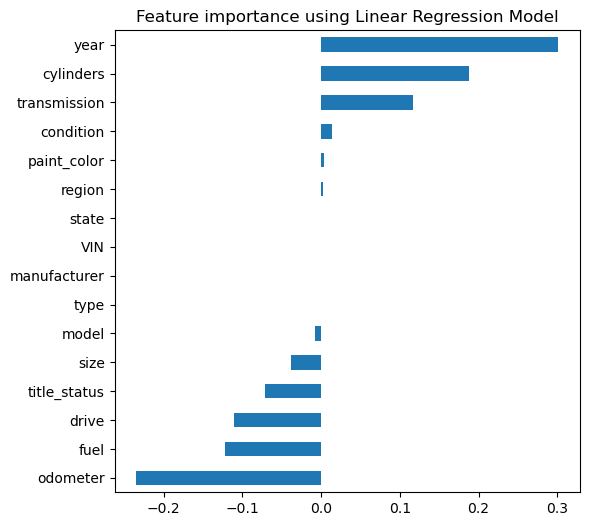

In [170]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

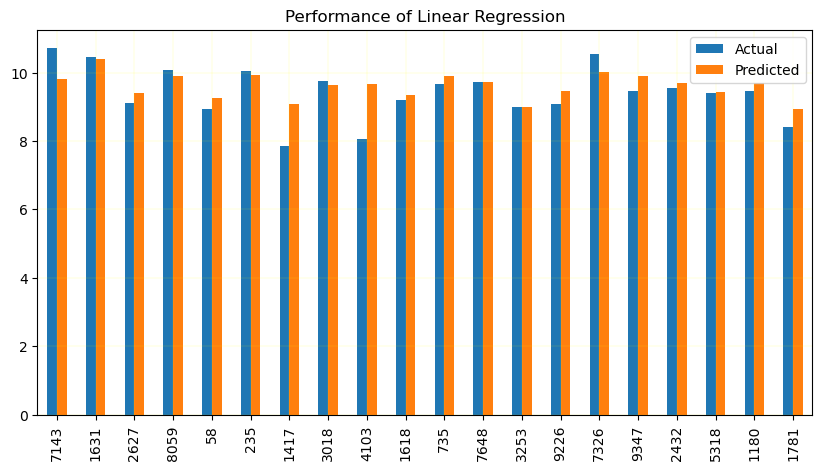

In [172]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Yellow')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

In [191]:
# Lasso Regression
cars_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
cars_pipe.fit(X_train, y_train)
lasso_coefs = cars_pipe.named_steps['lasso'].coef_

cars_pipe

Pipeline(steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

In [192]:
lasso_train_mse = mean_squared_error(y_train, cars_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, cars_pipe.predict(X_test))

print(f'Lasso Train MSE: {lasso_train_mse}')
print(f'Lasso Test MSE: {lasso_test_mse}')

Lasso Train MSE: 0.5345382862266169
Lasso Test MSE: 0.5280875196521975


In [ ]:
#Comparing Lasso to SequentialFeatureSelection
sequential_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                           ('selector', SequentialFeatureSelector(LinearRegression(), 
                                                                  n_features_to_select=6)),
                           ('linreg', LinearRegression())])
sequential_pipe.fit(X_train, y_train)
sequential_train_mse = mean_squared_error(y_train, sequential_pipe.predict(X_train))
sequential_test_mse = mean_squared_error(y_test, sequential_pipe.predict(X_test))

print(sequential_train_mse)
print(sequential_test_mse)
sequential_pipe

In [199]:
# Ridge Grid
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
selector_pipe
param_dict = {'selector__n_features_to_select': [2, 3, 4, 5]}
selector_grid = GridSearchCV(selector_pipe, param_grid=param_dict)
selector_grid.fit(X_train, y_train)
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)
selector_train_mse = mean_squared_error(y_train, train_preds)
selector_test_mse = mean_squared_error(y_test, test_preds)

In [201]:
#Ridge Grid
ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
ridge_pipe

Train MSE: 0.31689933623931144
Test MSE: 0.4033245023827333


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [202]:
#Examining the "best" model
best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_
### END SOLUTION

# Answer check
print(best_estimator)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')
pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('model', LinearRegression())])
Features from best selector: Index(['year', 'cylinders', 'fuel', 'odometer', 'drive'], dtype='object').
Coefficient values: 


,year,cylinders,fuel,odometer,drive
model,0.308039,0.196918,-0.103017,-0.244973,-0.105223


In [207]:
# Gridsearch CV
gridsearch_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}

In [209]:
grid_2 = GridSearchCV(gridsearch_pipe, param_grid=param_dict)
grid_2.fit(X_train, y_train)
train_preds = grid_2.predict(X_train)
test_preds = grid_2.predict(X_test)
model_2_train_mse = mean_squared_error(y_train, train_preds)
model_2_test_mse = mean_squared_error(y_test, test_preds)
model_2_best_alpha = grid_2.best_params_

print(f'GridSearch Test MSE: {model_2_test_mse}')
print(f'Best Alpha: {list(model_2_best_alpha.values())[0]}')

GridSearch Test MSE: 0.40353356429538856
Best Alpha: 1000.0


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [213]:
print(f'Train MSE: {backward_train_mse: .2f}')
print(f'Test MSE: {backward_test_mse: .2f}')
backward_pipe

Train MSE:  0.34
Test MSE:  0.42


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=3)),
                ('linreg', LinearRegression())])

In [203]:
# Lasso Regression model evaluation
lasso_train_mse = mean_squared_error(y_train, cars_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, cars_pipe.predict(X_test))

print(f'Lasso Train MSE: {lasso_train_mse}')
print(f'Lasso Test MSE: {lasso_test_mse}')

Lasso Train MSE: 0.5345382862266169
Lasso Test MSE: 0.5280875196521975


In [205]:
# Ridge Gride evaluation
print(f'Ridge Train MSE: {ridge_train_mse}')
print(f'Ridge Test MSE: {ridge_test_mse}')

Ridge Train MSE: 0.31689933623931144
Ridge Test MSE: 0.4033245023827333


In [210]:
print(f'GridSearch Test MSE: {model_2_test_mse}')
print(f'Best Alpha: {list(model_2_best_alpha.values())[0]}')

GridSearch Test MSE: 0.40353356429538856
Best Alpha: 1000.0


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

- By performing different ML models, we aim to get a better result or less error with max accuracy. Our purpose was to predict the price of the used cars.
- Data cleaning is performed to remove the null values, removed the duplicates of VIN and outliers from the dataset then ML models are implemented to predict the price of cars.
- With the help of data visualization features were explored deeply. The relation between the features is examined.
- The main factors that decides are the price of the car - Year, Cylinders and Transmission which are positively correlated.
- The negative correlated factors also has the impact on the higher price are Fuel, Odometer and Drive mode.
- Diesel cars also played major role in the higher price range.